# Statistics with Python

So far we have looked into loading, transforming and visualizing datasets with python. Todays session we will look at how we can do statistical tests with python. We will start with generating the basic stats for data we have, very similar to the our 6th session, and then move to carry out the statistical tests. First let us load the initial libraries and load the data and summarize the data for us

In [1]:
# Loading Pandas
import pandas as pd

# Loading the dataset
dm = pd.read_csv("/Users/muhammadsaqifulalam/Dropbox/My Mac (FVFD1URVP3XY)/Desktop/DirectMarketing.csv")

# Checking if we have our job properly
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [2]:
# To generate a quick summary of the numeric variables
dm.describe()

,Salary,Children,Catalogs,AmountSpent
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,1216.770000
std,30616.314826,1.05107,6.622895,961.068613
min,10100.000000,0.00000,6.000000,38.000000
25%,29975.000000,0.00000,6.000000,488.250000
50%,53700.000000,1.00000,12.000000,962.000000
75%,77025.000000,2.00000,18.000000,1688.500000
max,168800.000000,3.00000,24.000000,6217.000000


In [3]:
# If we want to generate a summary of Amount Spent across age groups and History
dm.groupby(["Age", "History"]).AmountSpent.agg(["min", "max", "mean", "median", "std", "count"])

min   max         mean  median          std  count
Age    History                                                    
Middle High     701  5878  2156.778443  1944.0   936.240948    167
       Low      157  1102   403.086957   356.0   214.691142     69
       Medium   448  2090   981.905512   927.0   345.285445    127
Old    High     565  6217  2277.666667  2057.0  1043.197093     81
       Low       65  1120   433.210526   436.5   230.830247     38
       Medium   438  1645   923.580000   884.5   297.199314     50
Young  High     979  3688  1827.428571  1512.0   959.409863      7
       Low       38   991   307.764228   268.0   174.384683    123
       Medium   486  1560   874.400000   833.0   290.441672     35

In [4]:
# If we want to see how the mean and median vary across Amount Spent and Salary for different age and location groups
dm.groupby(["Age", "Location"]).agg({"AmountSpent" : ["mean", "median"], "Salary" : ["mean", "median"]})


AmountSpent                Salary         
                        mean  median          mean   median
Age    Location                                            
Middle Close     1285.508108  1143.5  71827.297297  68400.0
       Far       2081.311594  1907.0  72597.101449  69350.0
Old    Close     1257.643357  1006.0  57361.538462  52200.0
       Far       1834.564516  1830.5  54069.354839  58800.0
Young  Close      499.065990   387.0  28276.649746  21700.0
       Far        688.988889   556.5  26487.777778  20750.0

In [5]:
# To check how frequently each age group comes to the shop
pd.crosstab(dm["Age"], dm["History"], margins = True)

History,High,Low,Medium,All
Age,,,,
Middle,167,69,127,363
Old,81,38,50,169
Young,7,123,35,165
All,255,230,212,697


In [6]:
# If we want to see the same thing , but now we want to see percentages of the total number of customers instead of counts
pd.crosstab(dm["Age"], dm["History"], margins = True, normalize = True)


History,High,Low,Medium,All
Age,,,,
Middle,0.239598,0.098996,0.182209,0.520803
Old,0.116212,0.054519,0.071736,0.242468
Young,0.010043,0.176471,0.050215,0.236729
All,0.365854,0.329986,0.304161,1.000000


What does this table tell us about the relationshp between frequency of visit and age group?

In [7]:
# What if we want to know how frequency of visit and distance from the shop, impact total spending
pd.crosstab(dm["History"], dm["Location"], values = dm["AmountSpent"], aggfunc = "sum", margins = True, normalize = True)

Location,Close,Far,All
History,,,
High,0.314323,0.348473,0.662797
Low,0.076339,0.021310,0.097648
Medium,0.184412,0.055143,0.239555
All,0.575074,0.424926,1.000000


Insight - 35% of the total spending is contributed by people who visit us regularly, and from far away. In fact people who visit us regularly contribute to 66% of the total spending!!!

Now that we have looked into quickly getting summary stats and other insights from the dataset, what about running some statistical tests?

## T Tests of Comparison of Mean

What if we want to know answer to these following questions:
1. Is there a difference in spending among the genders?
2. Does married people spend more compared to unmarried people?
3. Does people with children spend more than people without children?

To carry out these tests, we would need sub-library from the larger library scipy, stas. Scipy is a massive library that gets downloaded with anaconda, which gives you access to all science calculations, including stats. Loading the whole library would just slow the whole system down

In [8]:
# Loading a sub library from a larger library in python
from scipy import stats

In [9]:
# Now to run the Independent 2 sample t test to check the answer of the first question

stats.ttest_ind(dm[dm["Gender"] == "Male"].AmountSpent, dm[dm["Gender"] == "Female"].AmountSpent)

Ttest_indResult(statistic=6.505311639117184, pvalue=1.224352575593024e-10)

As you can see, the t value came out to be 6.5, and the p values is very very small, less than 0.05 significance, which means that the chances of the two means being equal is very very low. But the concern with this type of T Test result is its very bare, and if we are reporting for research journals, then its too less to create any value. For more detailed results, we will need to install a new library, bioinfokit

In [10]:
# lets set up python for installing the new library
import sys

# Lets install the new library
!{sys.executable} -m pip install bioinfokit

In [11]:
# Loading the funtion we will need from bioinfokit library
from bioinfokit.analys import stat

# For this library, we will need to create a new object which we will use to run the tests
res = stat()

# Now running the t test
res.ttest(df = dm, xfac = "Gender", res = "AmountSpent", test_type = 2)

print(res.summary)


Two sample t-test with equal variance

------------------  --------------
Mean diff           -387.51
t                     -6.50531
Std Error             59.5683
df                   998
p value (one-tail)     6.12176e-11
p value (two-tail)     1.22435e-10
Lower 95.0%         -504.404
Upper 95.0%         -270.617
------------------  --------------

Parameter estimates

Level      Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
Female        506  1025.34    910.529       40.478        945.814        1104.87
Male          494  1412.85    972.77        43.767       1326.86         1498.84



In [12]:
# Now we can look at the second question
res.ttest(df = dm, xfac = "Married", res = "AmountSpent", test_type = 2)

print(res.summary)




Two sample t-test with equal variance

------------------  --------------
Mean diff            914.256
t                     17.0931
Std Error             53.4868
df                   998
p value (one-tail)     5.95225e-58
p value (two-tail)     1.19045e-57
Lower 95.0%          809.297
Upper 95.0%         1019.22
------------------  --------------

Parameter estimates

Level      Number      Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  --------  ---------  -----------  -------------  -------------
Married       502  1672.07    1037.68       46.314        1581.08        1763.06
Single        498   757.813    592.201      26.5372        705.674        809.952



The warning suggests that the variance among the two groups are not equal. It also suggests us a solution to correct for the unequal variance and lets do that!

In [13]:
# Correcting for unequal variance
res.ttest(df = dm, xfac = "Married", res = "AmountSpent", test_type = 2, evar = False)

print(res.summary)




Two sample t-test with unequal variance (Welch's t-test)

------------------  --------------
Mean diff            914.256
t                     17.128
Std Error             53.3779
df                   797.334
p value (one-tail)     1.54417e-56
p value (two-tail)     3.08834e-56
Lower 95.0%          809.479
Upper 95.0%         1019.03
------------------  --------------

Parameter estimates

Level      Number      Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  --------  ---------  -----------  -------------  -------------
Married       502  1672.07    1037.68       46.314        1581.08        1763.06
Single        498   757.813    592.201      26.5372        705.674        809.952



Now lets get about running the test for the third question. The problem with this question is that there is no specific variable in the dataset that highlights whether there the customer has a child or not. We have a variable thats called number of children. Lets use if then else structure to create the variable we want

In [14]:
# Creating a new variable saying whether the customer has a children or not

# First we create an empty list
children_y_n = []

# Next we use our for loop and if then else to populate the list with values of Yes and No for whether the customer has children or not
for value in dm["Children"]:
    if value == 0:
        children_y_n.append("No")
    else:
        children_y_n.append("Yes")

# Now we would need to add this list as a column in our dm dataframe

dm["Children_Y_N"] = children_y_n

# To check if this worked
dm.head()
    

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Children_Y_N
0,Old,Female,Own,Single,Far,47500,0,High,6,755,No
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,No
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,No
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,Yes
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,No


It worked! See this is how what we have learned in our coding so far is coming to use. Now lets run the t test

In [15]:
# To check if the spending amount of people who have children is statistically different from those who dont
res.ttest(df = dm, xfac = "Children_Y_N", res = "AmountSpent", test_type = 2)

print(res.summary)


Two sample t-test with equal variance

------------------  -------------
Mean diff           352.92
t                     5.88608
Std Error            59.9583
df                  998
p value (one-tail)    2.69794e-09
p value (two-tail)    5.39587e-09
Lower 95.0%         235.261
Upper 95.0%         470.578
------------------  -------------

Parameter estimates

Level      Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
No            462  1406.64    986.843      45.9121       1316.42         1496.86
Yes           538  1053.72    908.087      39.1504        976.814        1130.63



In fact people with children do spend less than people without children

## ANOVA

For categorical data with multiple levels (Age, History), comparison is means using T Test is not possible. This is where we will need to rely on Analysis of Variance also known as ANOVA. Lets see how we can work with ANOVA in Python

In [16]:
# First we use the stats module from SciPy. Lets test if the spending is statistically different among different age groups
stats.f_oneway(dm[dm["Age"] == "Young"].AmountSpent, dm[dm["Age"] == "Old"].AmountSpent, dm[dm["Age"] == "Middle"].AmountSpent)



F_onewayResult(statistic=116.72170301924436, pvalue=2.8431990903622653e-46)

Agian, other than proving that the three groups average income is not equal, this is a very concise and short output actually. We can go back and rely on  bioinformatik library

In [17]:
# To check the above ANOVA using bioinformatiks stat package
res.anova_stat(df = dm, res_var = "AmountSpent", anova_model = "AmountSpent ~ Age")

print(res.anova_summary)

             df        sum_sq       mean_sq           F        PR(>F)
Age         2.0  1.750630e+08  8.753148e+07  116.721703  2.843199e-46
Residual  997.0  7.476663e+08  7.499160e+05         NaN           NaN


Now this gives us a bit more detail. It gives us both the variance between the groups and the variance within the groups, and helps us capture the F value and then lets us see the P value. And based on the P value we can conclude that the spending of each of the age groups are different. In fact we can confirm this by looking at the spending boxplots, that we learned in the previous session

<AxesSubplot:xlabel='Age', ylabel='AmountSpent'>

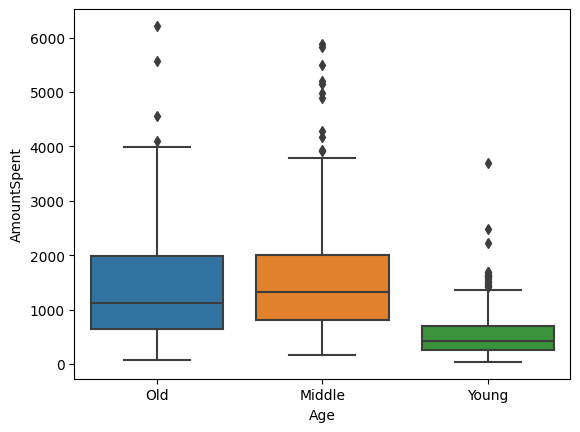

In [18]:
# To get the spending distribution based on the age group
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(x = "Age", y = "AmountSpent", data = dm)

But we can test this statistically as well, using a test called Tukeys HSD. This calculates the confidence interval of the different of means of each of the group. If there is any chance that there is no difference in the average of amountspent among the two groups, there will be a chance that the difference is zero, and it tells us what is that chance.

In [19]:
# To do the TukeyHSD
res.tukey_hsd(df = dm, res_var = "AmountSpent", xfac_var = "Age", anova_model = "AmountSpent ~ Age")

res.tukey_summary

/Users/muhammadsaqifulalam/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Old,Middle,49.931097,-151.037077,250.899271,0.825291,0.810001
1,Old,Young,969.889224,733.702194,1206.076253,13.640467,0.001000
2,Middle,Young,919.958127,717.334627,1122.581626,15.081391,0.001000


This shows that there is 81% chance that there is no difference of spending between the Old and Middle groups. But there onle 0.1% chance that there is no difference in spendng between Old vs Young and Middle vs Young age groups. Focus on the p-value column.

In [20]:
# To repeat the same for whether there is a difference in average spenidng between the differnt frequency of visit groups
res.anova_stat(df = dm, res_var = "AmountSpent", anova_model = "AmountSpent ~ History")

print(res.anova_summary)

# To get the tukeys HSD
res.tukey_hsd(df = dm, res_var = "AmountSpent", xfac_var = "History", anova_model = "AmountSpent ~ History")

print(res.tukey_summary)



             df        sum_sq       mean_sq           F         PR(>F)
History     2.0  4.245707e+08  2.122853e+08  541.884463  1.757938e-142
Residual  694.0  2.718772e+08  3.917539e+05         NaN            NaN
  group1  group2         Diff        Lower        Upper    q-value  p-value
0   High     Low  1829.050298  1695.362537  1962.738060  45.446154    0.001
1   High  Medium  1235.736312  1099.097143  1372.375480  30.040955    0.001
2    Low  Medium   593.313987   453.344272   733.283702  14.080357    0.001


/Users/muhammadsaqifulalam/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


This shows that the three groups have very different average spending!

## Chi Square tests

We have looked in how numeric values differ across groups, and statistically tested whether the values are statistically different among them. But what about cluster of non numeric values. For example, earlier in the session, we saw how customers frequency of visit varied across age groups. We can see thse data and ask, is there a relationship between the two variables. Does belonging to an age group makes you more likely to come to the shop? We can test this question using Chi Square test of Independence.

In [21]:
# First, lets look at the crosstab of age and history
pd.crosstab(dm["Age"], dm["History"], margins = True)

History,High,Low,Medium,All
Age,,,,
Middle,167,69,127,363
Old,81,38,50,169
Young,7,123,35,165
All,255,230,212,697


This shows that the middle aged group is more likely to come many times, and young age group is less likely to come many times. Now lets test this statistically

In [22]:
# We will using the basic scipy stats to start with

# first we will be creating a crosstab and storing it in an object
crosstab = pd.crosstab(dm["Age"], dm["History"])

# Next, we will be running the chi square test
stats.chi2_contingency(crosstab)

(182.5555493915048,
 2.106993724345617e-38,
 4,
 array([[132.80487805, 119.78479197, 110.41032999],
        [ 61.82926829,  55.76757532,  51.40315638],
        [ 60.36585366,  54.44763271,  50.18651363]]))

The first entry tells us about the chi square value, the second entry tells us about the p value of the chance of these two groups are being independent, and the third value tells us of the degree of freedom. Finally it shows us the expected values for each of the age groups and history, if they were actually independent. From this we can see that the chance of two variables being indepedent is almost 0, which means that the two variables are dependent. Interpretaion - the frequency of visit is related to the age group the customer belongs to.

But these results are again hard to understand. Lets see if we can use some other library to get more descriptive results

In [23]:
# Another library to help with statistical tests is researchpy. Lets install the library in our system and then load it

!{sys.executable} -m pip install researchpy

import researchpy as rp


In [24]:
# Now lets carry out the Chi Square test with researchpy
rp.crosstab(dm["Age"], dm["History"], test = "chi-square", expected_freqs = True, prop = "cell")

(        History                      
 History    High    Low Medium     All
 Age                                  
 Middle    23.96   9.90  18.22   52.08
 Old       11.62   5.45   7.17   24.25
 Young      1.00  17.65   5.02   23.67
 All       36.59  33.00  30.42  100.00,
                 Chi-square test   results
 0  Pearson Chi-square ( 4.0) =   182.5555
 1                    p-value =     0.0000
 2                 Cramer's V =     0.3619,
             History                        
 History        High         Low      Medium
 Age                                        
 Middle   132.804878  119.784792  110.410330
 Old       61.829268   55.767575   51.403156
 Young     60.365854   54.447633   50.186514)

This gives me a much more detailed summary of the result of the Chi Square Test! Feel free to test such test of dependence with other variables as well

## Chi Square Test for Goodness of Fit

Another test that comes in handy is the Chi Square GOF test. In this test, we see whether a certain variable in the dataset fits a certain distribution. Suppose the shop expects the age distribution of the customers are like - 20% Young, 40% Old and 40% Middle aged group. To statistically check whether this expectation is met, we can do a Chi Sq GOF test

To start with, we check the existing age distribution, byt group by and count

In [25]:
# To get the count of how many customers belong to each age group, and convert to a dataframe
age_data = pd.DataFrame(dm.groupby("Age").Age.count())

# Checking the table
age_data

,Age
Age,
Middle,508
Old,205
Young,287


In [26]:
# Entering a list where we also mention the expected frequency of the customers of each of the groups
# (Make sure we enter the frequency in the serial the real table is - Middle, Old, Young)
expected = [400,400,200]

# Running 
stats.chisquare(f_obs = age_data.Age, f_exp = expected)

Power_divergenceResult(statistic=162.0675, pvalue=6.419327412371936e-36)

The results show 2 things - the Chi Square statistics, the larger the number the larger the difference from the expected distribution by the shop. The p value gives us an idea that what is the chance that given the existing distribution of the data, the age distribution is 40% Middle and Old, and 20% Young. The chance is very very low

## Correlations

Another statistical analysis that would be very helpful is to look at how the numeric variables are correlated with each other. In the session where we loaded the data and looked at some summaries, we saw some of the pakages created quick correlation matrices for us, as part of the report. But now lets focus on creating the actual correlation matrix, and see how we can visualize it!

In [27]:
# The quickest way to generate a correlation matrix
dm.corr()

,Salary,Children,Catalogs,AmountSpent
Salary,1.000000,0.049663,0.183551,0.699596
Children,0.049663,1.000000,-0.113455,-0.222308
Catalogs,0.183551,-0.113455,1.000000,0.472650
AmountSpent,0.699596,-0.222308,0.472650,1.000000


We can see that there is strong positive correlation between Salary and Amount Spent (as expected). But at the same time, there is a moderate positive correlation among Catalogs and Amount Spent and a slight negative correlation among number of Children and Amount Spent

Now lets see if we can visualize this correlation matrix. We have already loading Seaborn and Matplotlib, so the task is pretty straightforward

<AxesSubplot:>

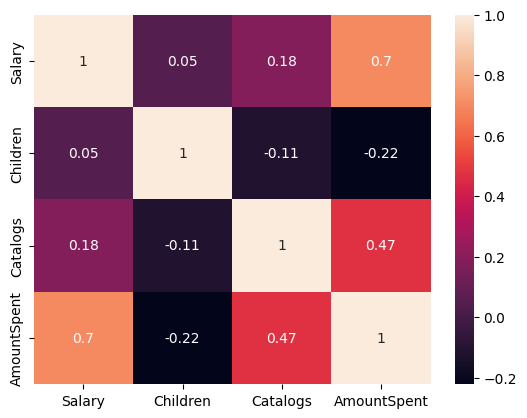

In [28]:
# Creating a correlation viz with the help of Seaborn
sns.heatmap(dm.corr(), annot = True)

We use the "annot = True" to get the correlation number along with the matrix

## Regression Analysis with Python

The last part of our statistical analysis would be regression. We will be covering simple linear regression and multiple linear regression. In python we can do more than just linear regression, such as probit and logit regression, and non linear regression, but unfortunately we do not have enough time cover them.

Lets start with a simple linear regression of how salary impacts spending amount. The libraries we will use carry out the regression numpy and another is statsmodel. Normally numpy is stored within anaconda, so we dont need to donwload numby, but we will install statsmodels first

In [29]:
# Installing statsmodel
!{sys.executable} -m pip install statsmodels

In [30]:
# Now loading both the libraries
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [31]:
# Now we will be creating our model

# First we will create a model object
simple_model = smf.ols(formula = "AmountSpent ~ Salary", data = dm)

simple_model_result = simple_model.fit()

simple_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AmountSpent   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     956.7
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          7.50e-148
Time:                        15:45:23   Log-Likelihood:                -7950.4
No. Observations:                1000   AIC:                         1.590e+04
Df Residuals:                     998   BIC:                         1.591e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.3178     45.374     -0.338      0.736    -104.358      73.722
Salary         0.0220      0.001     30.930      0.000       0.021       0.023
==============================================================================
Omnibus:                      189.162   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.029
Skew:                           0.868   Prob(JB):                    1.32e-153
Kurtosis:                       6.726   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Thats it, we have run a simple linear regression with python. This shows that with increase of salary by 1000 BDT, the spending increases by 22 BDT. From the R square we can see that the model explains 49% of real life variation. Now lets see what happens if we run multiple regression, with Salary, Catelogs and Number of Children

In [32]:
# Creating the model object
mult_model1 = smf.ols(formula = "AmountSpent ~ Salary + Catalogs + Children", data = dm)

# Generating the results
mult_model1_res = mult_model1.fit()

# Printing the results
mult_model1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AmountSpent   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     640.0
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          9.56e-232
Time:                        15:45:23   Log-Likelihood:                -7749.4
No. Observations:                1000   AIC:                         1.551e+04
Df Residuals:                     996   BIC:                         1.553e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -442.7579     53.718     -8.242      0.000    -548.171    -337.345
Salary         0.0204      0.001     34.417      0.000       0.019       0.022
Catalogs      47.6953      2.755     17.310      0.000      42.288      53.102
Children    -198.6947     17.087    -11.628      0.000    -232.226    -165.163
==============================================================================
Omnibus:                      258.685   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1001.795
Skew:                           1.185   Prob(JB):                    2.90e-218
Kurtosis:                       7.292   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model is capable of explaining 66% of the real life variation, and tells us that with every 1000 BDT increase in Salary, spending goes up by 20 BDT, with every single catalog given to customer, the spending goes up by 48 BDT, and with every extra children a customer has, spending goews down by 199 BDT.

In [33]:
# How about we check for all the variables in the dataset and how they impact sending amount

# First creating the model
mult_reg_all = smf.ols(formula = "AmountSpent ~ Age + Gender + Married + Location + Catalogs + History + Children + Salary + OwnHome", data = dm)

# The lets fit the model and get the result
mult_reg_all_result = mult_reg_all.fit()

# Finally printing out the summary
mult_reg_all_result.summary()
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AmountSpent   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     232.5
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          9.81e-223
Time:                        15:45:23   Log-Likelihood:                -5261.6
No. Observations:                 697   AIC:                         1.055e+04
Df Residuals:                     685   BIC:                         1.060e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -249.5792    134.031     -1.862      0.063    -512.740      13.581
Age[T.Old]           41.3855     52.764      0.784      0.433     -62.213     144.984
Age[T.Young]         89.6540     58.741      1.526      0.127     -25.679     204.987
Gender[T.Male]      -53.7006     38.016     -1.413      0.158    -128.342      20.941
Married[T.Single]    19.5026     49.812      0.392      0.696     -78.299     117.305
Location[T.Far]     608.9925     43.985     13.845      0.000     522.630     695.355
History[T.Low]     -267.5142     88.617     -3.019      0.003    -441.507     -93.521
History[T.Medium]  -344.5525     59.964     -5.746      0.000    -462.288    -226.817
OwnHome[T.Rent]     -18.2885     41.512     -0.441      0.660     -99.794      63.217
Catalogs             40.5208      2.868     14.128      0.000      34.889      46.152
Children           -268.2835     25.019    -10.723      0.000    -317.407    -219.160
Salary                0.0188      0.001     15.124      0.000       0.016       0.021
==============================================================================
Omnibus:                      265.717   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1645.241
Skew:                           1.581   Prob(JB):                         0.00
Kurtosis:                       9.831   Cond. No.                     5.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How about you give it a try to explain the regression output! End of this session

Another useful thing to check is the interaction effect. In basic regression and multiple regression, we assume that the variables impact the spending amount independently. But what if there are variables than impact spending amount together instead of independently? Suppose we want to check if the salary along with catalog impact spending amount of the customer. Lets check the regression

In [34]:
# First we enter the formula of the model
interaction_reg = smf.ols(formula = "AmountSpent ~ Salary + Catalogs + Salary:Catalogs", data = dm)

# Fitting the model
interaction_reg_result = interaction_reg.fit()

# Finally printing out the result
interaction_reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AmountSpent   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     616.1
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          2.32e-226
Time:                        15:45:23   Log-Likelihood:                -7761.8
No. Observations:                1000   AIC:                         1.553e+04
Df Residuals:                     996   BIC:                         1.555e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          68.5491     86.803      0.790      0.430    -101.788     238.886
Salary              0.0061      0.001      4.171      0.000       0.003       0.009
Catalogs           -0.4001      5.739     -0.070      0.944     -11.662      10.862
Salary:Catalogs     0.0009    9.1e-05     10.363      0.000       0.001       0.001
==============================================================================
Omnibus:                      145.945   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              600.168
Skew:                           0.629   Prob(JB):                    4.73e-131
Kurtosis:                       6.581   Cond. No.                     5.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""